In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [29]:
# training data 
c = np.array([ 
    [3,1,1,2,3,1,1,3,3,1,3,3,1,2,1,2,3,1,1,3], 
    [4,6,6,4,4,6,5,4,5,4,6,6,4,6,5,4,6,5,4,5], 
    [3,5,4,3,5,3,5,4,3,3,3,5,5,5,4,5,4,3,4,5] 
])
c = c.transpose()

f = np.array([
    [-1.784756126,2.459396867,2.257275088,-1.210910465,-0.6847118428,
     1.359352584,1.782888766,-0.8868336222,-0.8474503192,-0.2544613231,
     -0.170942218,0.9291020647,0.8455829597,1.502947725,1.580766987,
     -0.1108661827,0.7269802854,0.6828444833,0.6434611803,0.2525939635],
    [0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0]
])
# f = np.array([
#     [-1.78475,2.45939,2.25727,-1.21091,-0.68471,
#      1.35935,1.78288,-0.88683,-0.84745,-0.25446,
#      -0.17094,0.92910,0.84558,1.50294,1.58076,
#      -0.11086,0.72698,0.68284,0.64346,0.25259],
#     [0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0]
# ])
f = f.transpose()

# test data
a = np.array([ [2, 6, 3], [2, 6, 4], [2, 4, 4], 
               [2, 5, 3], [2, 5, 5], [3, 5, 4], [2, 5, 4] ])

1/1 [==============================] - 0s 53ms/step
[0.59414554 0.91085124]
[1.3614616 1.0660104]
[-0.21392941 -0.07090788]
[-0.14783275  0.0534854 ]
[0.8655317 1.0453739]
[ 0.1714127  -0.03241332]
[0.7708945  0.96917367]


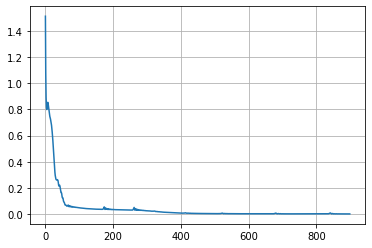

dict_keys(['loss']) 

Model layers: 

	 inputs number:  3
	 outputs number:  2

Layers weights: 

[array([[ 1.8056921 , -0.95756793, -1.2872628 ,  0.15490401, -0.7779725 ],
       [-1.4860109 , -1.5605506 ,  2.4044816 , -0.19407457, -1.3028374 ],
       [-0.11939642, -1.6436424 , -0.6100203 , -2.2022264 , -0.82869   ]],
      dtype=float32), array([ 4.2208285 , -0.84779435, -4.7906246 ,  7.2952414 , -1.0245535 ],
      dtype=float32)] 

[array([[  0.1489686 , -11.132894  ,  -2.016882  ,  -1.3276402 ,
         -7.6135087 ],
       [  1.1266179 ,  -1.4947221 ,  -0.05826326,  -0.30877095,
         -0.24560568],
       [ -2.5809429 ,   0.19535626,  -1.2324572 ,   2.578114  ,
          4.6987076 ],
       [ -2.5455256 ,  -2.4309392 ,  -2.950301  ,  -4.0166836 ,
         -8.680062  ],
       [ -0.3214979 ,  -0.8993855 ,  -0.46190166,  -0.69648904,
         -0.6651983 ]], dtype=float32), array([-1.1613601 ,  0.25899538, -1.138369  ,  0.94464767,  2.294047  ],
      dtype=float32)] 

[array([[

In [34]:
# модель багатошарової нейронної мережі
model = keras.Sequential()
#bias_initializer = keras.initializers.HeNormal()

# вхідні дані
model.add(keras.Input(shape=(3,)))
# 1 слой 3 нейрони
model.add(Dense(
    units=5,                    # кількість нейронів
    #input_shape=(3,),           # кількість входів
    activation='sigmoid',       # активаційна функція
    #use_bias=True,              # використовувати зсув
    #bias_initializer='zeros'    # значення зсуву
))
# 2 слой 3 нейрони
model.add(Dense(
    units=5,                    # кількість нейронів
    #input_shape=(3,),           # кількість входів
    activation='sigmoid',       # активаційна функція
    #use_bias=True,              # використовувати зсув
    #bias_initializer='zeros'    # значення зсуву
))
# 3 слой 2 нейрони
model.add(Dense(
    units=2,                    # кількість нейронів
    #input_shape=(3,),           # кількість входів
    #activation='sigmoid',       # активаційна функція
    #use_bias=True,              # використовувати зсув
    #bias_initializer='zeros'    # значення зсуву
))

# loss критерій якості (середня квадратична помилка)
# оптимізатор алгоритм градієнтного спуску
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
# навчання мережі
history = model.fit(c, f, epochs=900, verbose=0)

# test network
ansv = model.predict(a)
for i in ansv:
    print(i)

# графіки
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

# системна інформація
print(history.history.keys(), '\n')
print("Model layers: \n")
print("\t inputs number: ", model.input_shape[1])
model_layers = model.layers
for layer in model_layers:
    print('\t',layer)
print("\t outputs number: ", model.output_shape[1])
print('\nLayers weights: \n')
for layer in model_layers:
    print(layer.get_weights(), '\n')

# expected result
# [ 0.40290344,  0.        ],
# [ 1.30082594,  1.        ],
# [-0.31298796,  0.        ],
# [-0.27360466,  0.        ],
# [ 0.82643962,  1.        ],
# [ 0.05047218,  0.        ],
# [ 0.62431784,  1.        ]]